In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
from skimage.morphology import erosion
from skimage.morphology import disk
from skimage.filters import prewitt
import math
from scipy.stats import norm
import pandas as pd
import seaborn as sns
from skimage import color, io, measure, segmentation, img_as_ubyte
from skimage.filters import threshold_otsu
from skimage.filters import gaussian
from skimage.color import label2rgb
from scipy.spatial import distance
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import warp
from skimage.transform import matrix_transform
from exam_functions import *

# DEC 2022


## 1


1. Reads the DICOM image
2. Uses the annotated regions to extract pixel values in the liver, kidney and aorta
   regions
3. Determines two threshold using minimum distance classification. Threshold
   number (t1) separates the liver and the kidney. The second threshold (t2)
   separates the kidney and the aorta.
4. Segments the DICOM image by setting all pixel that have a value >t1 and <t2 to
   foreground and the rest to background.
5. Computes the DICE score between the resulting segmented image and the
   KidneyROI.png image.


In [2]:
in_dir = "Exams/dec2022/data/"
im_name = "dicom/1-162.dcm"
ct = dicom.read_file(in_dir + im_name)
img = ct.pixel_array

In [4]:
liver_roi = io.imread(in_dir + "LiverROI.png")
liver_mask = liver_roi > 0
liver_values = img[liver_mask]
kidney_roi = io.imread(in_dir + "KidneyROI.png")
kidney_mask = kidney_roi > 0
kidney_values = img[kidney_mask]
aorta_roi = io.imread(in_dir + "AortaROI.png")
aorta_mask = aorta_roi > 0
aorta_values = img[aorta_mask]
# print(f"liver: {liver_values}\nkidney: {kidney_values}\naorta: {aorta_values}")

In [5]:
mu_liver = np.mean(liver_values)
mu_kidney = np.mean(kidney_values)
mu_aorta = np.mean(aorta_values)

t_liver_kidney = (mu_liver + mu_kidney) / 2
t_kidney_aorta = (mu_kidney + mu_aorta) / 2
print(t_liver_kidney, t_kidney_aorta)

135.53619417264818 196.7035801627044


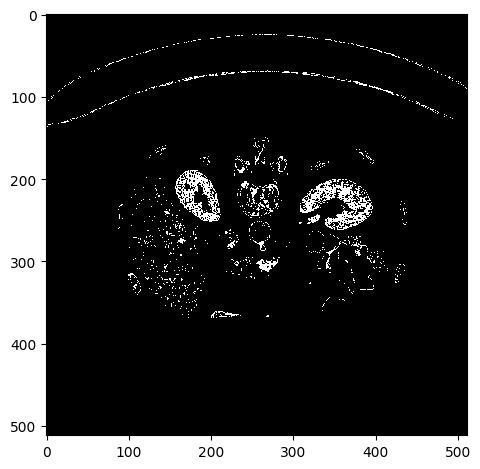

In [6]:
kidney_img = (img > t_liver_kidney) & (img < t_kidney_aorta)
io.imshow(kidney_img)
io.show()

In [9]:
dice_score = 1 - distance.dice(kidney_img.ravel(), kidney_roi.ravel())
print(f"DICE score {dice_score:.3f}")

DICE score 0.241


## 2


The five data points (x, y):

(7,13), (9,10), (6,10), (6,8), (3,6)

result in the corresponding five Hough space sinograms (curves in Hough space) shown below.

Two Hough space sinograms are crossing at (rho = 0.29, theta = 151 ).

What are the corresponding data points for the two crossing curves in Hough space? (approximately)


In [4]:
convert_xy_to_hough(0.29, 151, [7, 9, 6, 6, 3])

Approximate data points in the xy-plane:
(7, 13.23)
(9, 16.83)
(6, 11.42)
(6, 11.42)
(3, 6.01)


## 3


We are searching for the shortest path going from the top to the bottom
of the image below.

You are using dynamic programming for the task
and as part of that you are computing an accumulator image.

What is the
minimal value of the last row of the computed accumulator image?


In [5]:
print(f"minimal value = {19 + 23 + 17 + 18 + 44}")

minimal value = 121


## 4


In [3]:
integral_value = [33, 12, 110, 200, 53, 81, 220, 120, 107]

integral_image(integral_value)

INTEGRAL IMAGE = 936


## 5


1. Converts the input image from RGB to gray scale and transforms it into a floating
   point image.
2. Does a linear gray scale transformation so the transformed image has a minimum
   pixel value of 0.1 and a maximum pixel value of 0.6
3. Computes a pixel value threshold using Otsu's method
4. Applies the found threshold, so all pixels with values above the threshold
   becomes foreground (white) and the rest background (black)


0.3724609375


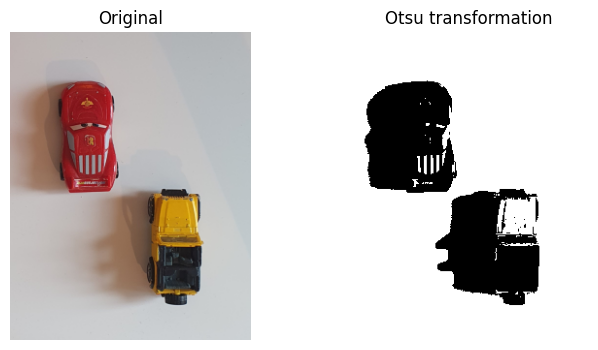

In [5]:
def func5():
    img_path = "Exams\dec2022\data\PixelWiseOps\pixelwise.png"

    im_1 = io.imread(img_path)

    grey_img = color.rgb2gray(im_1)

    transf_img = linear_gray_scale_transformation(grey_img, 0.1, 0.6)

    tresh = threshold_otsu(transf_img)

    print(tresh)
    img_otsu = transf_img > tresh

    show_comparison(im_1, img_otsu, "Otsu transformation")


func5()

## 6


You would like to make a cool black and white illustration of a rocket.

To do that you filter the image (rocket.png) with a Prewitt filter.

Secondly, you threshold the filtered image, so all pixels with a value above 0.06
become white and the rest black.

How many white pixels are there in the
resulting image?


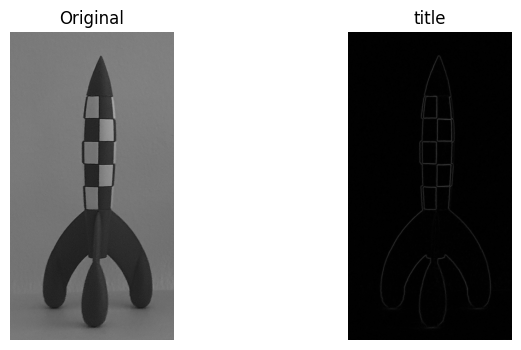

Number of edge pixels 23484


In [9]:
from skimage import io, img_as_ubyte, filters

rocket = io.imread(in_dir + "Filtering/rocket.png")

img_prewitt = filters.prewitt(img_as_ubyte(rocket))
show_comparison(rocket, img_prewitt, "title")

bin_edges = img_prewitt > 0.06
num_pixels = bin_edges.sum()
print(f"Number of edge pixels {num_pixels}")